In [231]:
import pyspark as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import time
import datetime
import numpy as np

In [2]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('lecture')
         .getOrCreate()
        )
sc = spark.sparkContext

In [131]:
league = pd.read_csv('league-tables/result.csv')
league

,year,title,Team,A,D,F,GD,L,P,Pos,Pts,W
0,2016/2017,Premier League 2016-2017,Chelsea,33,3,85,52,5,38,1,93,30
1,2016/2017,Premier League 2016-2017,Tottenham Hotspurs,26,8,86,60,4,38,2,86,26
2,2016/2017,Premier League 2016-2017,Manchester City,39,9,80,41,6,38,3,78,23
3,2016/2017,Premier League 2016-2017,Liverpool,42,10,78,36,6,38,4,76,22
4,2016/2017,Premier League 2016-2017,Arsenal,44,6,77,33,9,38,5,75,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1888/1889,First Division 1888-89,Everton,46,2,35,-11,11,22,8,20,9
1339,1888/1889,First Division 1888-89,Burnley,62,3,42,-20,12,22,9,17,7
1340,1888/1889,First Division 1888-89,Derby County,60,2,41,-19,13,22,10,16,7
1341,1888/1889,First Division 1888-89,Notts County,73,2,39,-34,15,22,11,12,5


In [132]:
cols = league.columns.tolist()
cols

['year', 'title', 'Team', 'A', 'D', 'F', 'GD', 'L', 'P', 'Pos', 'Pts', 'W']

In [133]:
cols = ['year', 'Team', 'Pos', 'P', 'Pts', 'W', 'D', 'L', 'F', 'A', 'GD', 'title']

In [134]:
league = league[cols]

In [150]:
league2016 = league[0:20]
teams2016=league2016.Team.unique()

In [135]:
chelsea_pos = league[league['Team'] == 'Chelsea']
mancity_pos = league[league['Team'] == 'Manchester City']
manutd_pos = league[league['Team'] == 'Manchester United']
arsenal_pos = league[league['Team'] == 'Arsenal']

In [168]:
league2016

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
1,2016/2017,Tottenham Hotspurs,2,38,86,26,8,4,86,26,60,Premier League 2016-2017
2,2016/2017,Manchester City,3,38,78,23,9,6,80,39,41,Premier League 2016-2017
3,2016/2017,Liverpool,4,38,76,22,10,6,78,42,36,Premier League 2016-2017
4,2016/2017,Arsenal,5,38,75,23,6,9,77,44,33,Premier League 2016-2017
5,2016/2017,Manchester United,6,38,69,18,15,5,54,29,25,Premier League 2016-2017
6,2016/2017,Everton,7,38,61,17,10,11,62,44,18,Premier League 2016-2017
7,2016/2017,Southampton,8,38,46,12,10,16,41,48,-7,Premier League 2016-2017
8,2016/2017,Bournemouth,9,38,46,12,10,16,55,67,-12,Premier League 2016-2017
9,2016/2017,West Bromwich Albion,10,38,45,12,9,17,43,51,-8,Premier League 2016-2017


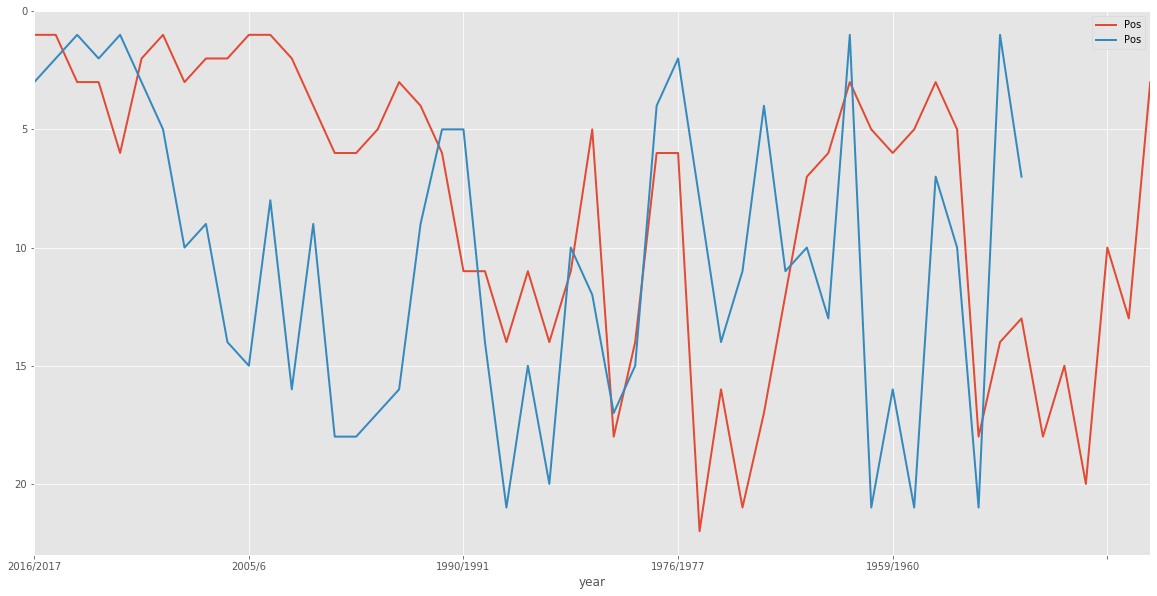

In [265]:
fig, ax = plt.subplots(figsize = [20,10])
ax.set_ylim(23, 0)
chelsea_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)
mancity_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)
# manutd_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)
# arsenal_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)

In [161]:
teams = league.Team.unique()
prominent_teams = ["Manchester United", "Liverpool", "Chelsea", "Manchester City", 'Arsenal', 'Tottenham Hotspurs']

Text(0, 0.5, 'Position')

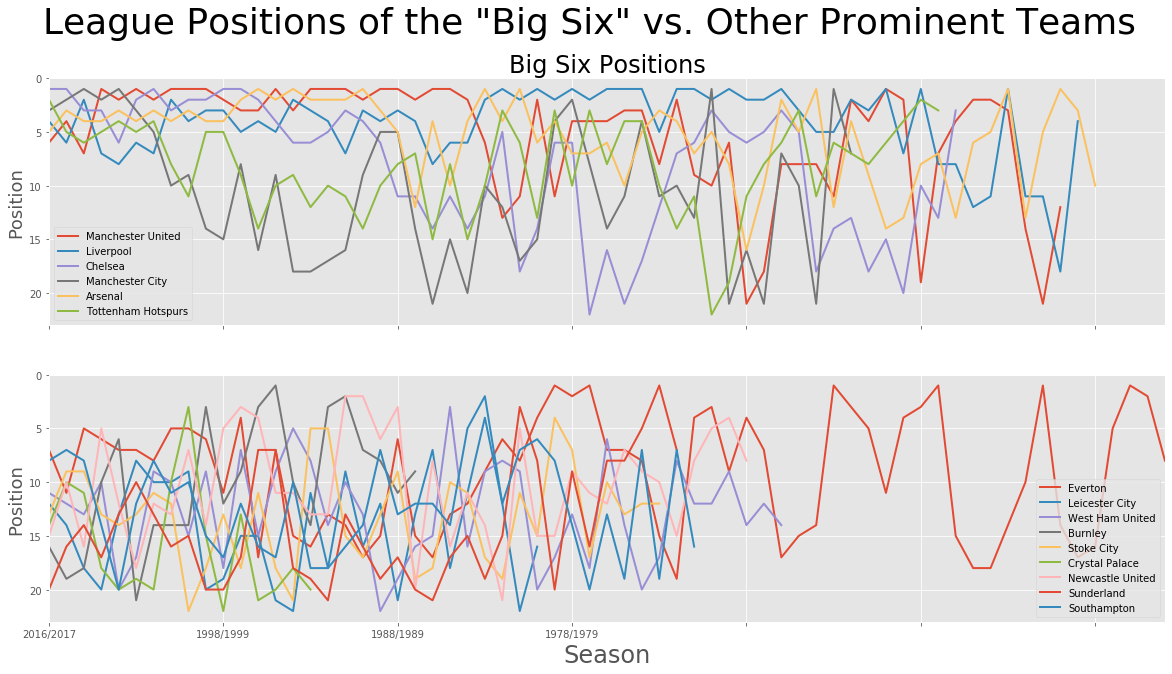

In [264]:
fig, ax = plt.subplots(2, sharex = True, figsize = [20,10])
fig.suptitle('League Positions of the "Big Six" vs. Other Prominent Teams', fontsize =36)
ax[0].set_ylim(23, 0)
ax[1].set_ylim(23, 0)
for i in prominent_teams:
    pos = league[league['Team'] == i]
    pos.plot(ax=ax[0], x = 'year', y = 'Pos', linewidth = 2, label = i)
for i in lasting_teams:
    pos = league[league['Team'] == i]
    pos.plot(ax=ax[1], x = 'year', y = 'Pos', linewidth = 2, label = i)
    
ax[0].set_title('Big Six Positions', fontsize = 24)
ax[1].set_xlabel('Season', fontsize = 24)
ax[0].set_ylabel('Position', fontsize =18)
ax[1].set_ylabel('Position', fontsize = 18)

In [218]:
lasting_teams = ['Everton', 'Leicester City', 'West Ham United', 'Burnley', 'Stoke City', 'Crystal Palace','Newcastle United', 'Sunderland', 'Southampton']

In [212]:
league

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
1,2016/2017,Tottenham Hotspurs,2,38,86,26,8,4,86,26,60,Premier League 2016-2017
2,2016/2017,Manchester City,3,38,78,23,9,6,80,39,41,Premier League 2016-2017
3,2016/2017,Liverpool,4,38,76,22,10,6,78,42,36,Premier League 2016-2017
4,2016/2017,Arsenal,5,38,75,23,6,9,77,44,33,Premier League 2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1888/1889,Everton,8,22,20,9,2,11,35,46,-11,First Division 1888-89
1339,1888/1889,Burnley,9,22,17,7,3,12,42,62,-20,First Division 1888-89
1340,1888/1889,Derby County,10,22,16,7,2,13,41,60,-19,First Division 1888-89
1341,1888/1889,Notts County,11,22,12,5,2,15,39,73,-34,First Division 1888-89


In [278]:
champs = league[league['Pos'] == 1]
champs

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
20,2014/2015,Chelsea,1,38,87,26,9,3,73,32,41,Barclaycard Premier League 2014-2015
40,2013/2014,Manchester City,1,38,86,27,5,6,102,37,65,Barclaycard Premier League 2013-2014
60,2012/2013,Manchester United,1,38,89,28,5,5,86,43,43,Barclaycard Premier League 2012-2013
80,2011/2012,Manchester City,1,38,89,28,5,5,93,29,64,Barclaycard Premier League 2011-2012
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1919/1920,West Bromwich Albion,1,42,60,28,4,10,104,47,57,1919/1920 First Division
1293,1891/1892,Sunderland,1,26,42,21,0,5,93,36,57,First Division 1891-92
1307,1890/1891,Everton,1,22,29,14,1,7,63,29,34,First Division 1890-91
1319,1889/1890,Preston North End,1,22,33,15,3,4,71,30,41,First Division 1889-90


In [279]:
standard_champs = champs[champs['P'] == 38]

In [302]:
standard_champs

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
20,2014/2015,Chelsea,1,38,87,26,9,3,73,32,41,Barclaycard Premier League 2014-2015
40,2013/2014,Manchester City,1,38,86,27,5,6,102,37,65,Barclaycard Premier League 2013-2014
60,2012/2013,Manchester United,1,38,89,28,5,5,86,43,43,Barclaycard Premier League 2012-2013
80,2011/2012,Manchester City,1,38,89,28,5,5,93,29,64,Barclaycard Premier League 2011-2012
100,2010/2011,Manchester United,1,38,80,23,11,4,78,37,41,Barclaycard Premier League 2010-2011
120,2009/2010,Chelsea,1,38,86,27,5,6,103,32,71,Barclaycard Premier League 2009-2010
140,2008/2009,Manchester United,1,38,90,28,6,4,68,24,44,Barclaycard Premier League 2008-2009
160,2007/2008,Manchester United,1,38,87,27,6,5,80,22,58,Barclaycard Premier League 2007-2008
180,2006/2007,Manchester United,1,38,89,28,5,5,83,27,56,Barclaycard Premier League 2006-2007


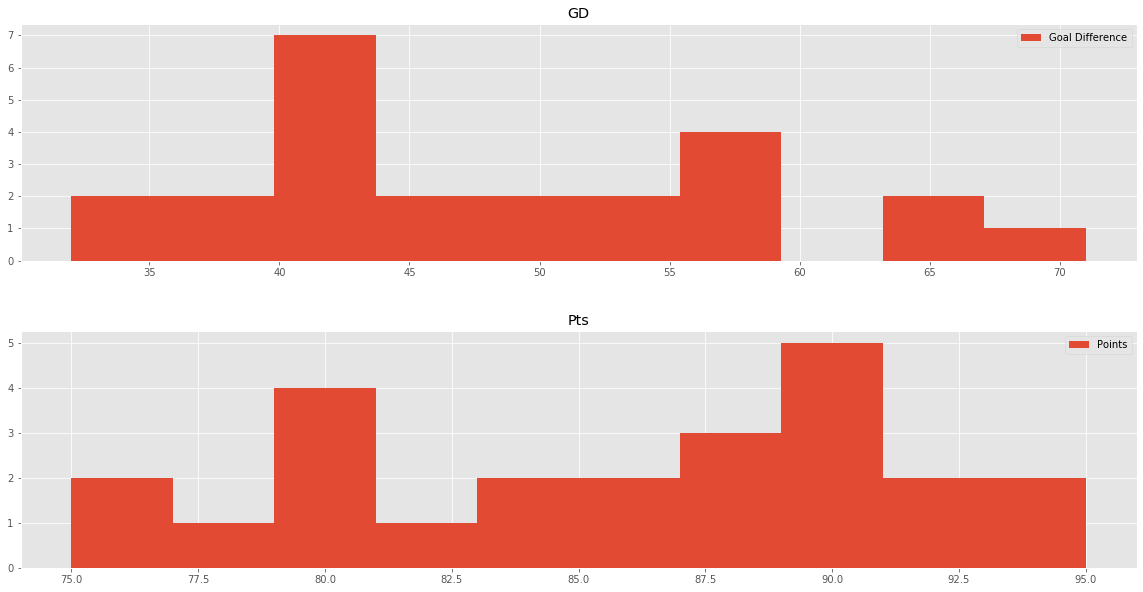

In [293]:
fig, ax = plt.subplots(2, figsize=[20,10])
standard_champs.hist(column='GD', ax=ax[0], label='Goal Difference')

standard_champs.hist(column='Pts', ax=ax[1], label='Points')
ax[0].legend()
ax[1].legend()

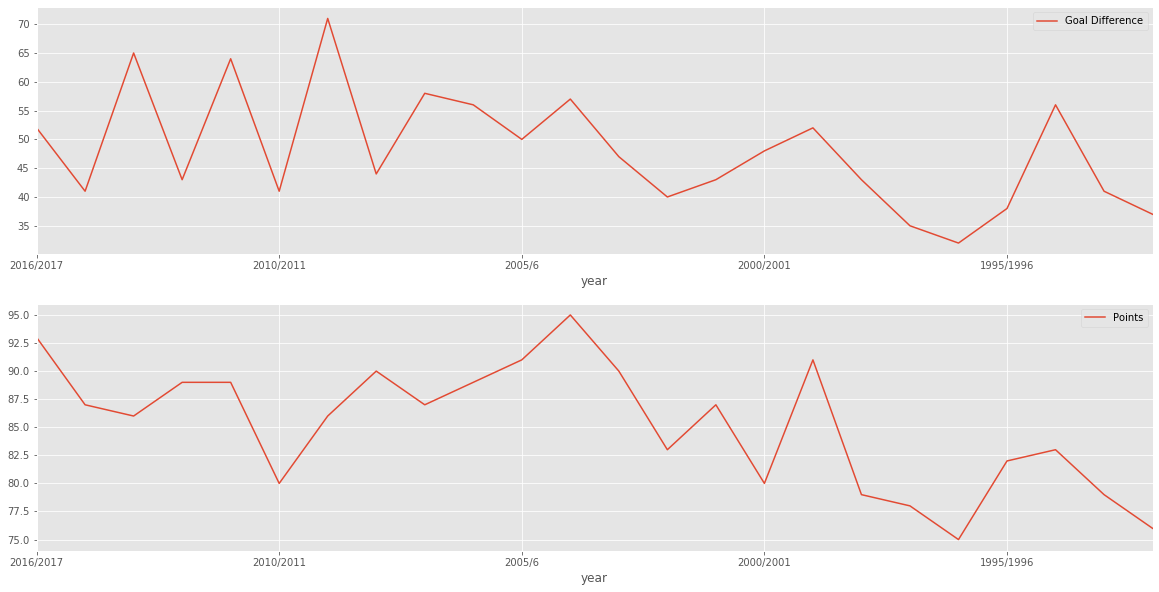

In [299]:
fig, ax = plt.subplots(2, figsize=[20,10])
standard_champs.plot(x = 'year', y='GD', ax=ax[0], label='Goal Difference')
standard_champs.plot(x = 'year', y ='Pts', ax=ax[1], label='Points')
ax[0].legend()
ax[1].legend()

In [300]:
standard_champs.corr()

,Pos,P,Pts,W,D,L,F,A,GD
Pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pts,NaN,NaN,1.000000,0.958425,-0.612681,-0.375606,0.232542,-0.435768,0.561881
W,NaN,NaN,0.958425,1.000000,-0.809431,-0.103665,0.333554,-0.372303,0.611558
D,NaN,NaN,-0.612681,-0.809431,1.000000,-0.500142,-0.446688,0.090712,-0.505291
L,NaN,NaN,-0.375606,-0.103665,-0.500142,1.000000,0.264711,0.395375,-0.045989
F,NaN,NaN,0.232542,0.333554,-0.446688,0.264711,1.000000,0.361498,0.696978
A,NaN,NaN,-0.435768,-0.372303,0.090712,0.395375,0.361498,1.000000,-0.416641
GD,NaN,NaN,0.561881,0.611558,-0.505291,-0.045989,0.696978,-0.416641,1.000000
